(12275, 826) (35396, 826) (27558, 826)


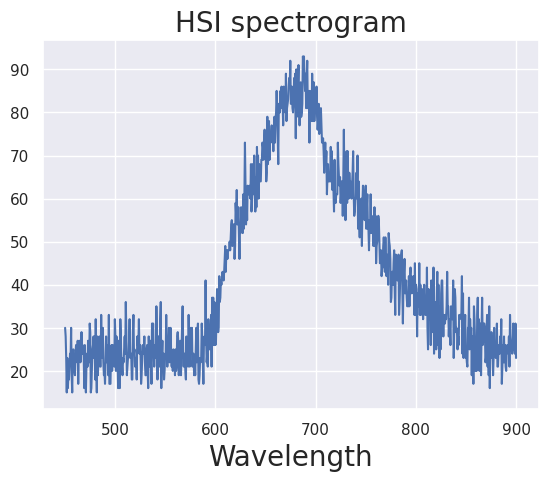

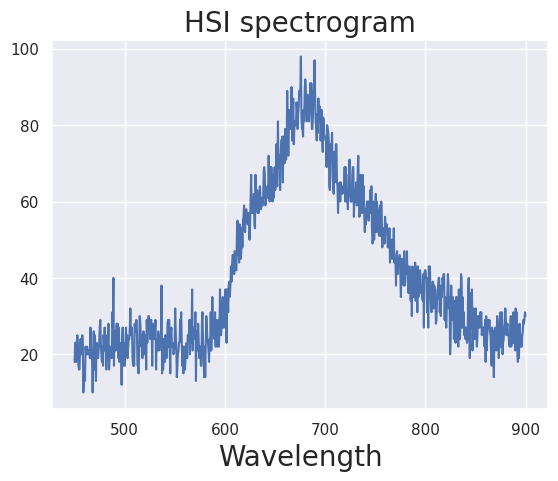

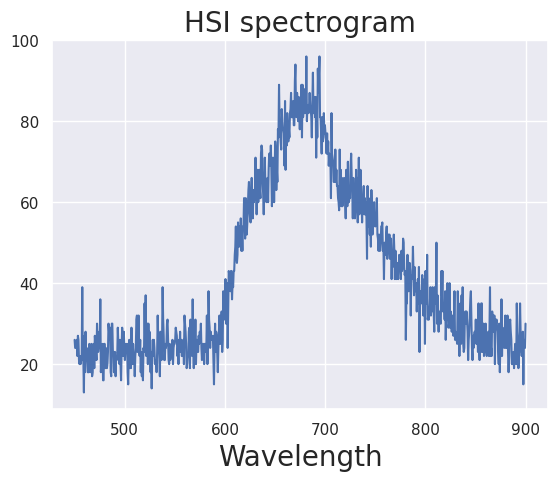

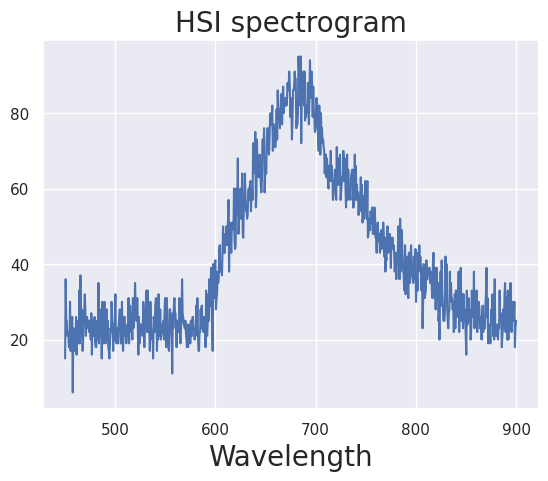

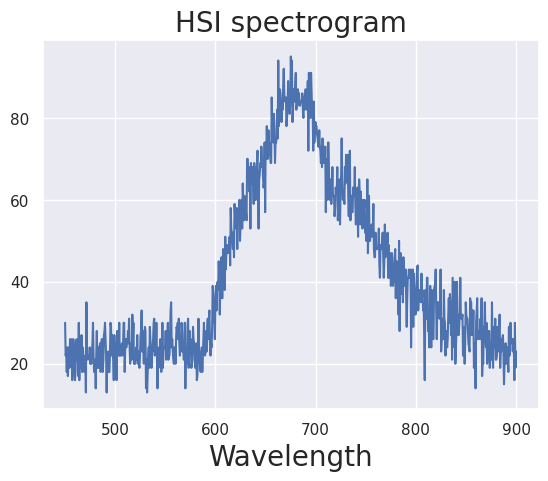

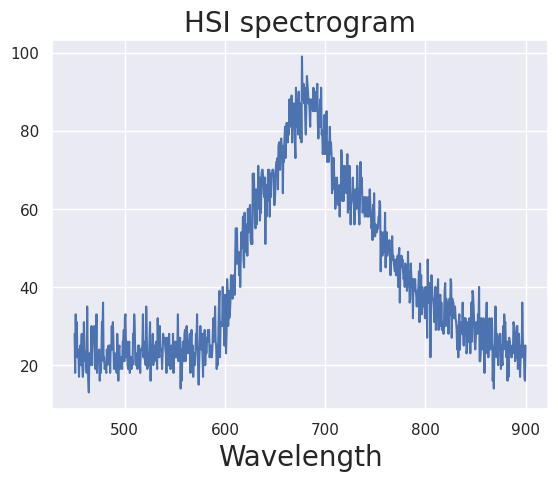

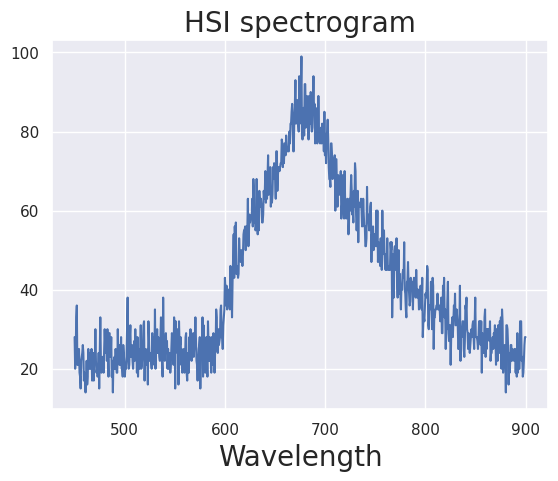

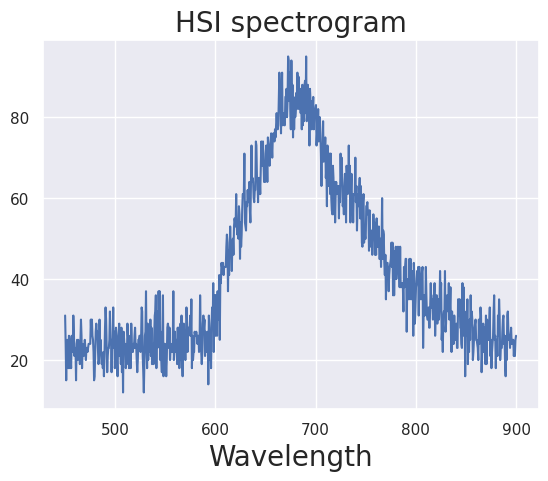

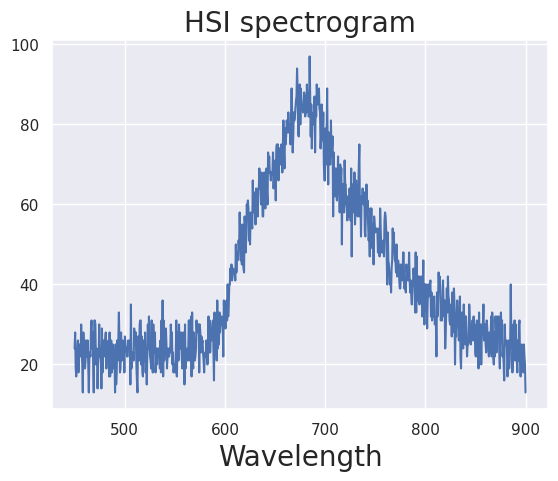

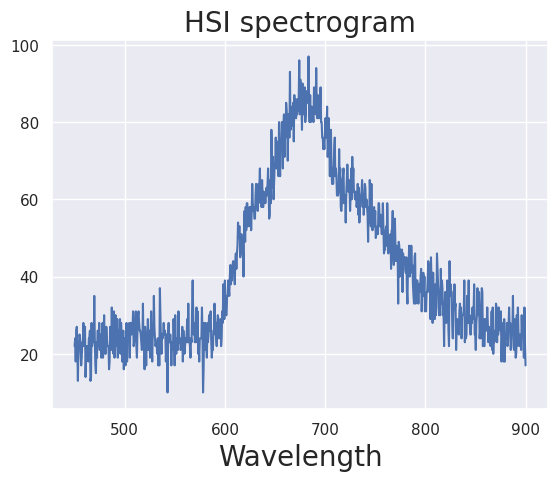

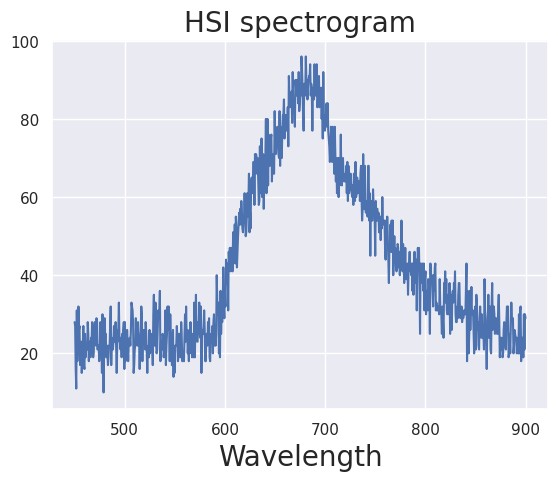

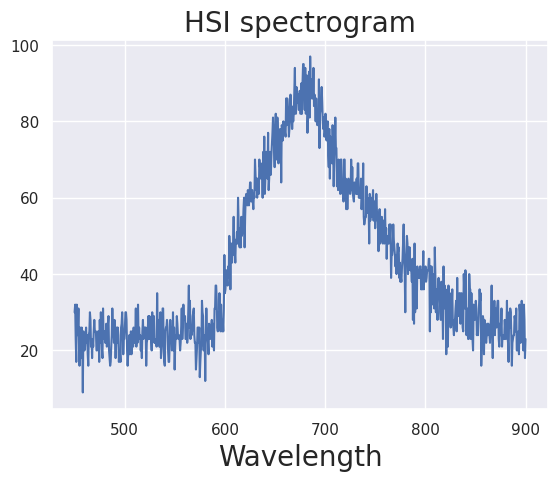

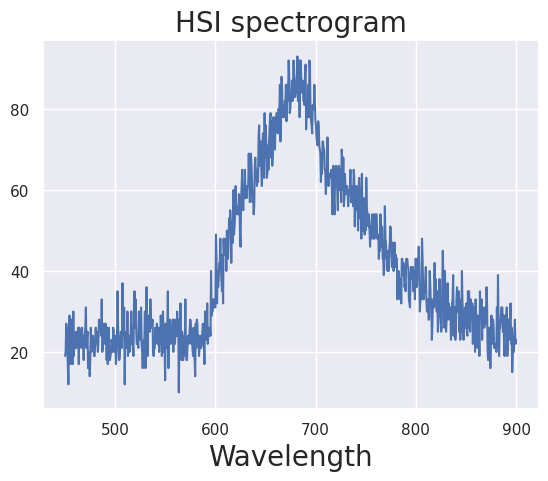

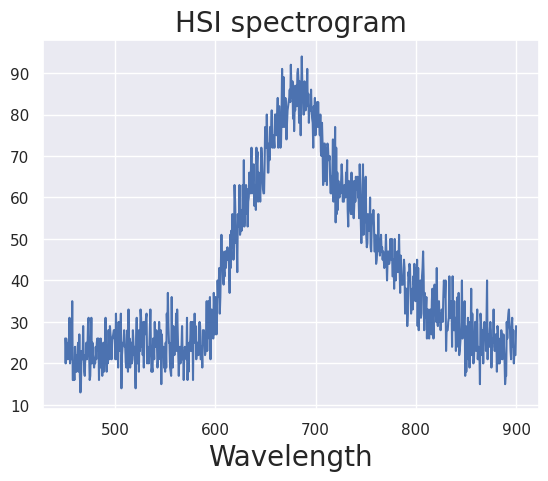

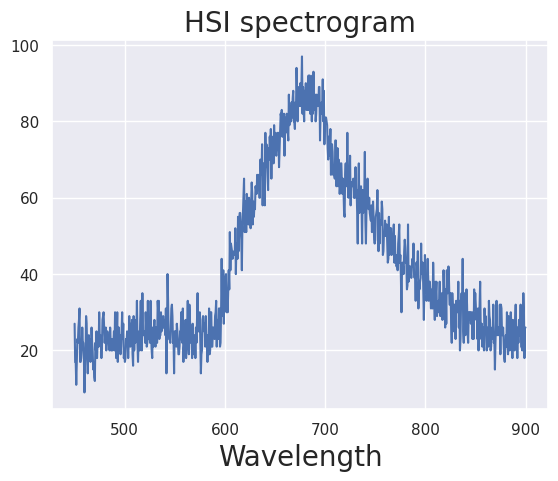

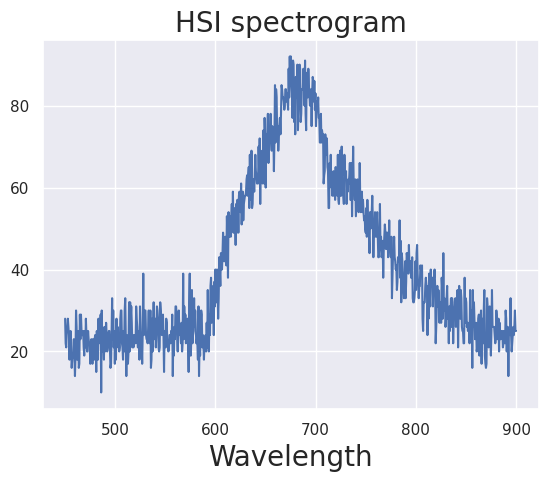

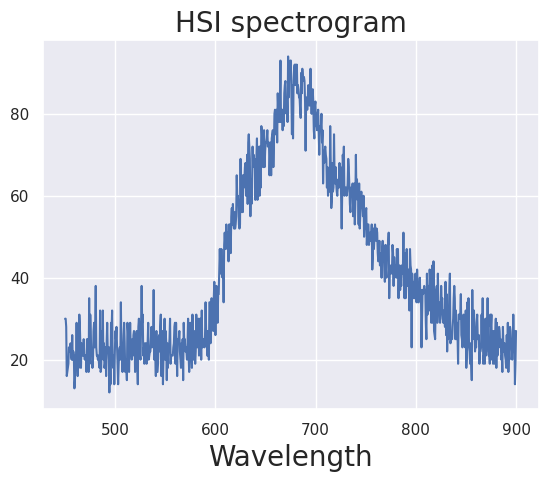

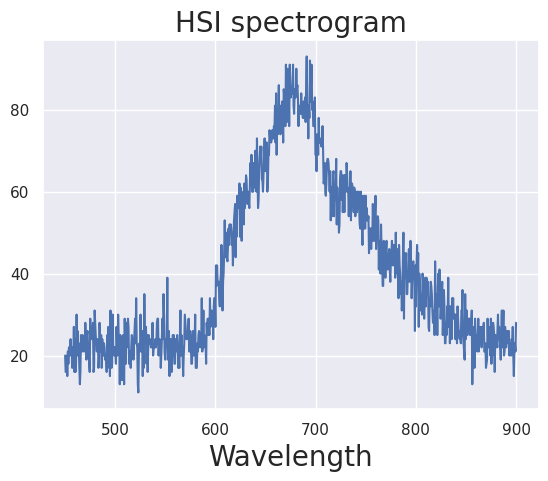

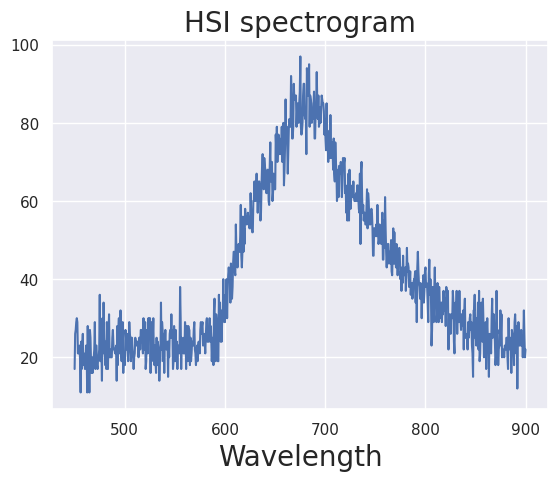

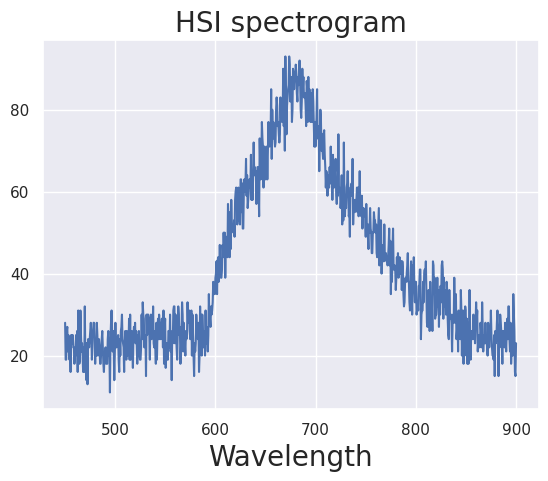

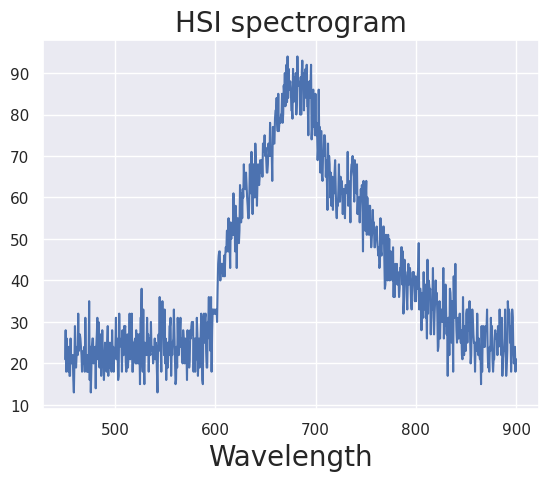

In [186]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# load lists for tumor, normal, and blood spectras. In total we have: 
# tumor 1221+138+855+3139+30+2046+3655+1282 spectras, 
# normal 2295+2187+10626+4516+6553+1251+1178+2643+1328+1842+977 spectras,
# blood 1331+1000+2332+8697+6041+64+4089+1064+452+68+1513+907 spectras,

tumor = np.load('pca_tumor_normal.npz')['tumor']
normal = np.load('pca_tumor_normal.npz')['normal']
blood = np.load('pca_tumor_normal.npz')['blood']
print(tumor.shape,normal.shape,blood.shape)

wavelength = np.linspace(450, 900, 826)

for i in range(len(tumor)):
    
    plt.plot(wavelength, tumor[i])
    plt.xlabel("Wavelength", fontsize=20)
    plt.title("HSI spectrogram", fontsize=20)
    plt.show()
    
    if i==20:
        break

# Tumor tissue

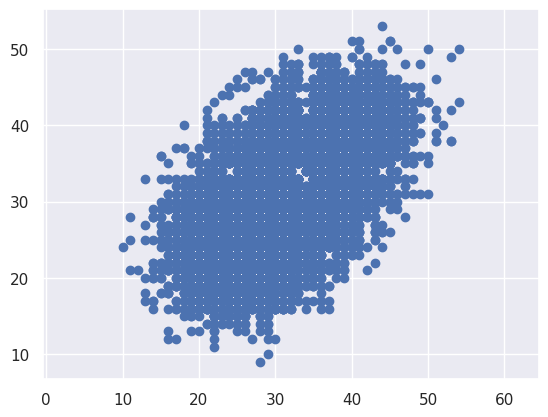

In [191]:
tumor = np.asarray(tumor)
T = tumor[:10000,:]
plt.scatter(T[:, 0], T[:, 1])
plt.axis('equal');



In [207]:
from sklearn.decomposition import PCA
pca_t = PCA(n_components=2)
pca_t.fit(T)



PCA(n_components=2)

[ 30.363   29.8075  29.5647  29.212   29.2036  29.0618  29.1299  29.1379
  29.1646  29.1357  28.9964  29.0048  29.1085  29.1303  29.2539  29.3662
  29.4011  29.3959  29.5701  29.4414  29.6647  29.831   30.0073  30.0942
  30.3134  30.4625  30.6904  30.8213  31.0597  31.2619  31.5689  31.8969
  32.0724  32.4383  32.7136  32.9367  33.4059  33.7478  34.1096  34.6169
  34.9974  35.5112  36.1263  36.7843  37.3072  37.5489  38.0013  38.669
  39.1325  39.8393  40.4028  40.9832  41.6578  42.2949  43.0398  43.815
  44.5871  45.1549  45.9324  46.5495  47.3372  48.0471  48.9372  49.7942
  50.4672  51.3682  52.1883  53.01    53.7684  54.6144  55.6018  56.5486
  57.4542  58.3269  59.3519  60.0337  60.9599  61.8979  62.9537  63.8518
  64.8061  65.8663  66.8118  67.7489  68.7837  69.6076  70.6502  71.7577
  72.7504  73.7787  74.8377  75.9338  76.9385  77.9972  78.8797  79.866
  81.0027  82.0009  82.863   83.8069  84.8489  85.9365  86.8026  87.8007
  88.9472  89.8997  90.9398  91.8508  92.9338  94.0554

ValueError: too many values to unpack (expected 2)

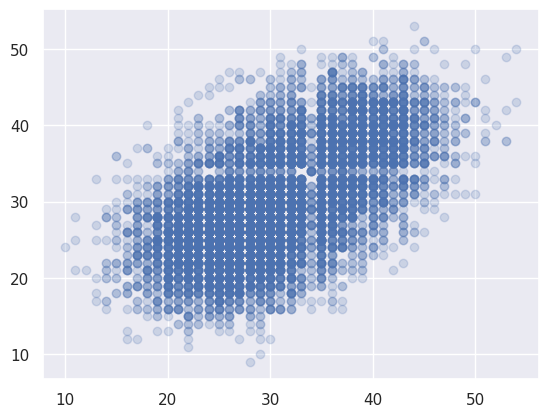

In [226]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    #print(v0.shape)
    ax.annotate('', v0, v1, arrowprops=arrowprops)

# plot data
plt.scatter(T[:, 0], T[:, 1], alpha=0.2)

for length, vector in zip(pca_t.explained_variance_, pca_t.components_):
    v = vector * 3 * np.sqrt(length)
    print(pca_t.mean_)
    draw_vector(pca_t.mean_, pca_t.mean_ + v)
    #print(T[0, 0])
    #plt.arrow(0, 0, T[0, 0]*vector[0], T[1, 0]*vector[1], color = 'r', alpha = 0.5)
plt.axis('equal');

Text(0.5, 1.0, 'tumor')

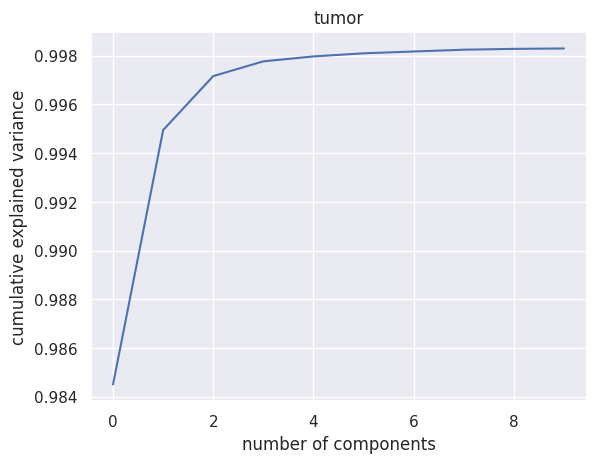

In [194]:
plt.plot(np.cumsum(pca_t.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('tumor')

Text(0.5, 1.0, 'tumor')

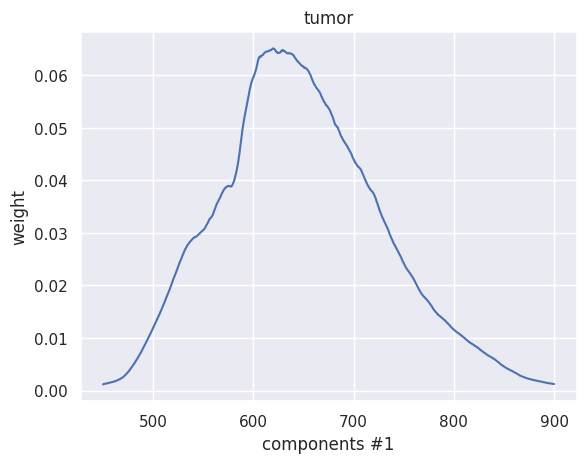

In [73]:
ix = 0

plt.plot(wavelength, pca.components_[ix])
plt.xlabel('components #{}'.format(ix+1))
plt.ylabel('weight');
plt.title('tumor')

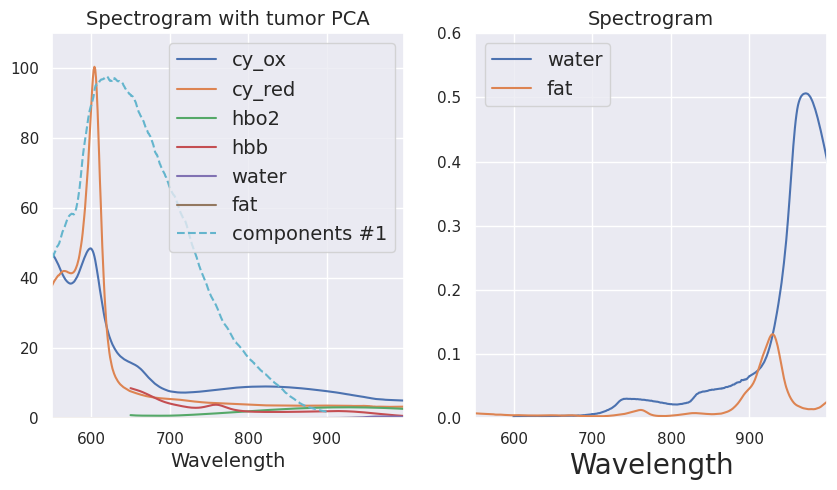

In [106]:
path_absorp = "/home/ivan/aimlab/UCL-NIR-Spectra/spectra/"
hbo2_absorp = path_absorp + "hb02.txt"
hhb_absorp = path_absorp + "hb.txt"
water_absorp = path_absorp + "matcher94_nir_water_37.txt"
diff_cyto_absorp = path_absorp + "cytoxidase_diff_odmMcm.txt"
fat_absorp = path_absorp + "fat.txt"
cyto_oxy_absorp = path_absorp + "moody cyt aa3 oxidised.txt"
cyto_red_absorp = path_absorp + "moody cyt aa3 reduced.txt"

### reading cpectra from .txt
def read_spectra(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y

x_cox, y_cox = read_spectra(cyto_oxy_absorp) # cytochrome oxydised
x_cred, y_cred = read_spectra(cyto_red_absorp) # cytochrome reduced
x_hbo2, y_hbo2 = read_spectra(hbo2_absorp) # oxyhemoglobin
x_hbb, y_hbb = read_spectra(hhb_absorp) # hemoglobin
x_water, y_water = read_spectra(water_absorp) # water
x_fat, y_fat = read_spectra(fat_absorp)

y_cox = [i * 2.3025851 for i in y_cox] # from extinction to absorption  
y_cred = [i * 2.3025851 for i in y_cred] # from extinction to absorption  
y_water = [i * 2.3025851 for i in y_water] # from extinction to absorption  
y_hbo2 = [i * 10 * 1000 for i in y_hbo2] # from mm and micromole to cm and minimole 
y_hbb = [i * 10 * 1000 for i in y_hbb] # from mm and micromole to cm and minimole
y_fat = [i / 100 for i in y_fat] # from m to cm 

### Visualising spectrograms of chromophores
fig, (ax, ax1) = plt.subplots(ncols=2,figsize=(10,5))

ax.plot(x_cox, y_cox, label='cy_ox')
ax.set_xlabel("Wavelength", fontsize=14)
ax.plot(x_cred, y_cred, label='cy_red')
ax.plot(x_hbo2, y_hbo2, label='hbo2')
ax.plot(x_hbb, y_hbb, label='hbb')
ax.plot(x_water, y_water, label='water')
ax.plot(x_fat, y_fat, label='fat')
ax.plot(wavelength, pca.components_[ix]*1500, 'c--', label='components #{}'.format(ix+1))
ax.set_title("Spectrogram with tumor PCA", fontsize=14)
ax.set_xlim(left_cut, right_cut)
ax.set_ylim(0, 110)
ax.legend(fontsize=14)


ax1.plot(x_water, y_water, label='water')
ax1.set_xlabel("Wavelength", fontsize=20)
ax1.plot(x_fat, y_fat, label='fat')
#ax.set_xlabel("Wavelength", fontsize=20)
ax1.set_title("Spectrogram", fontsize=14)
ax1.set_xlim(left_cut, right_cut)
ax1.set_ylim(0, 0.6)
ax1.legend(fontsize=14)



# Normal tissue

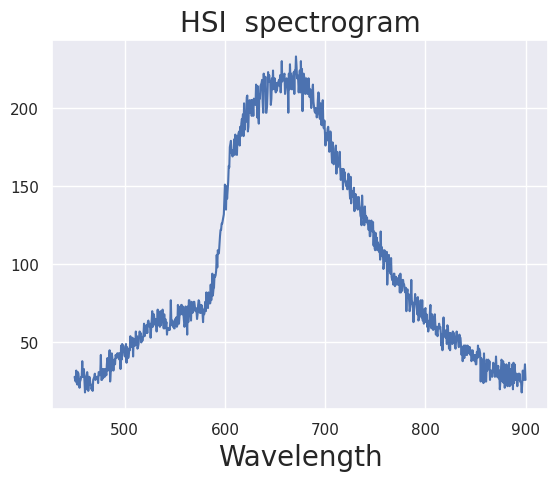

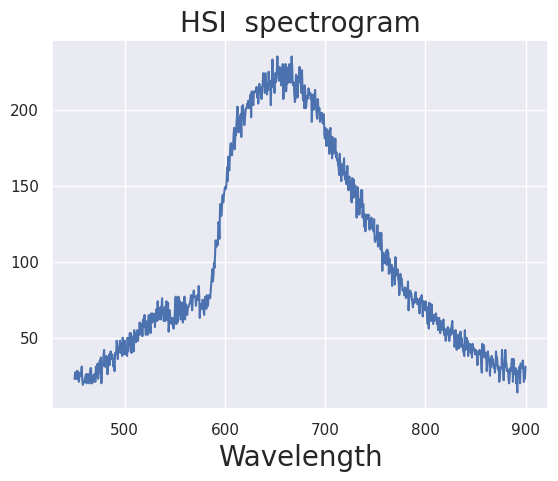

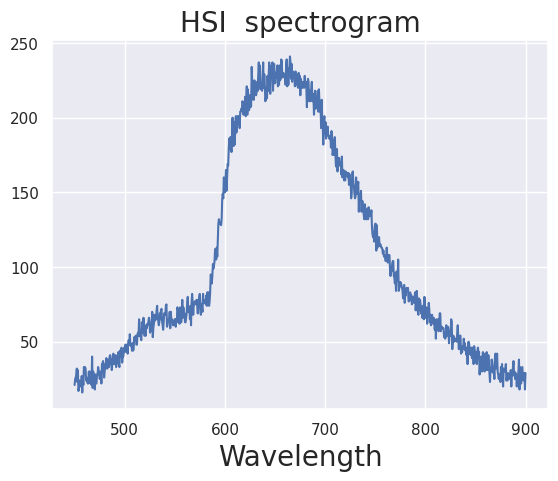

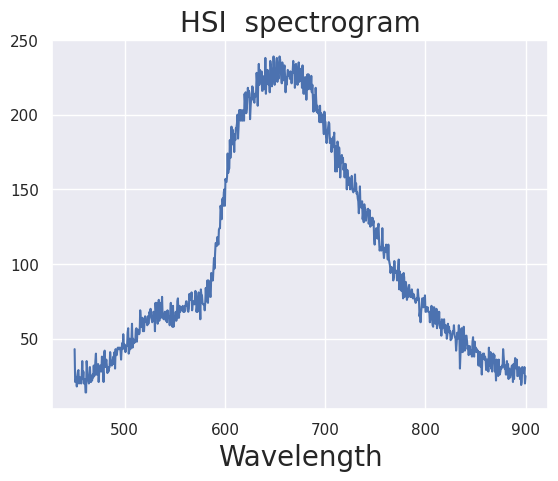

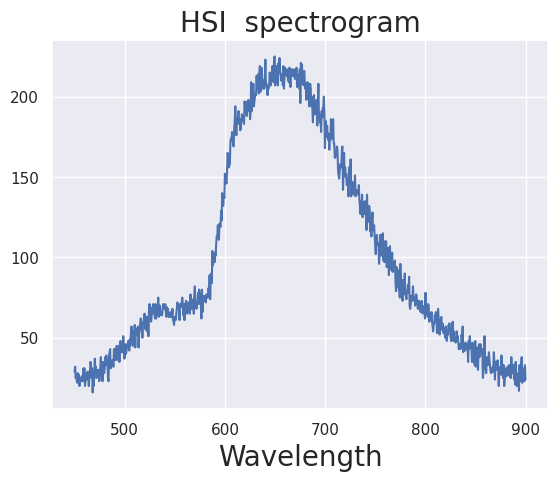

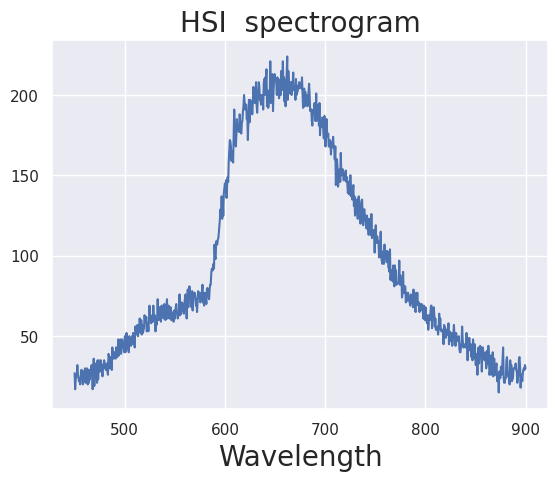

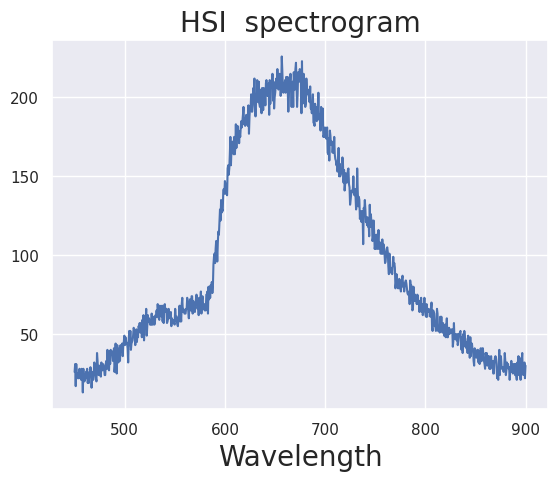

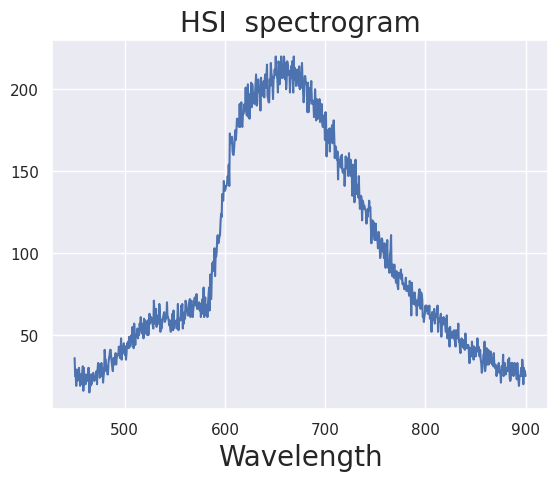

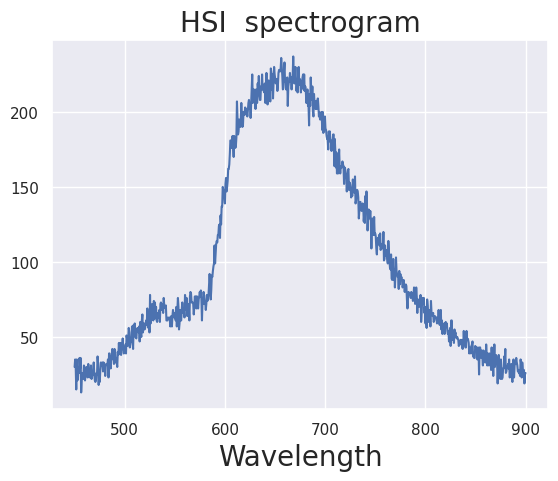

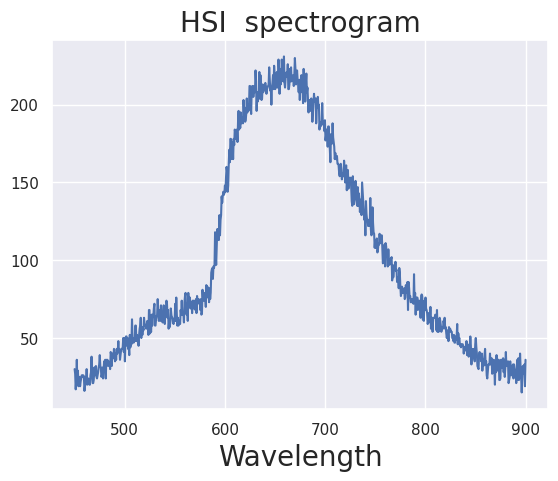

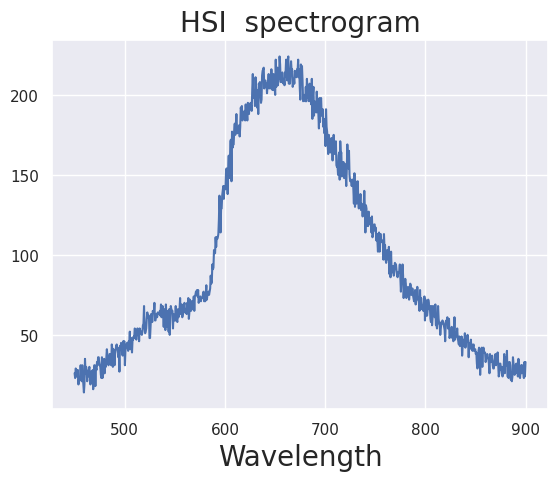

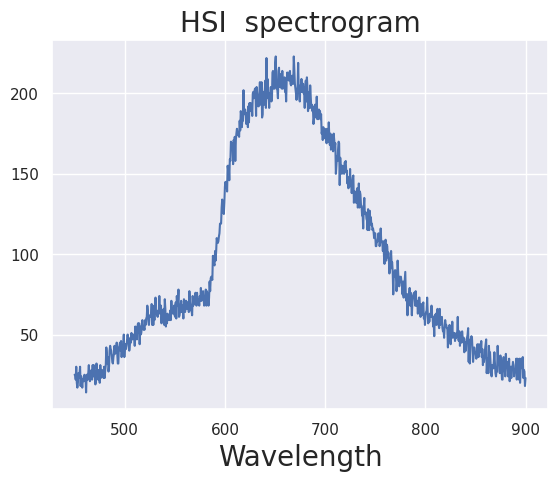

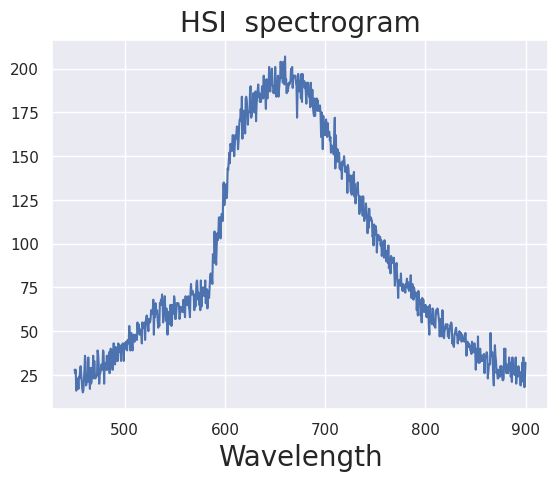

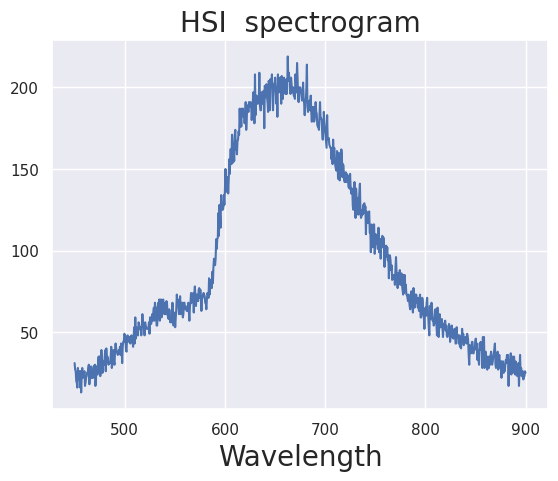

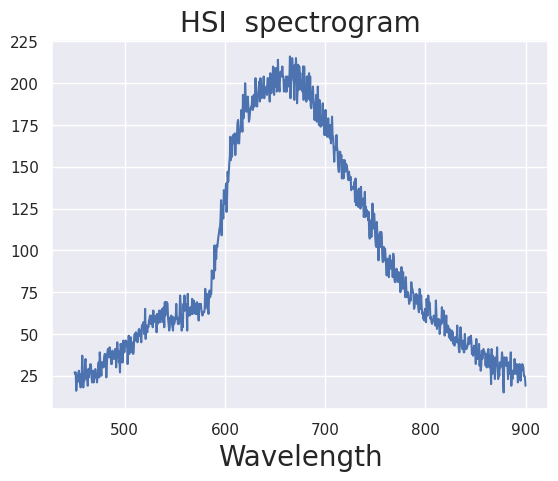

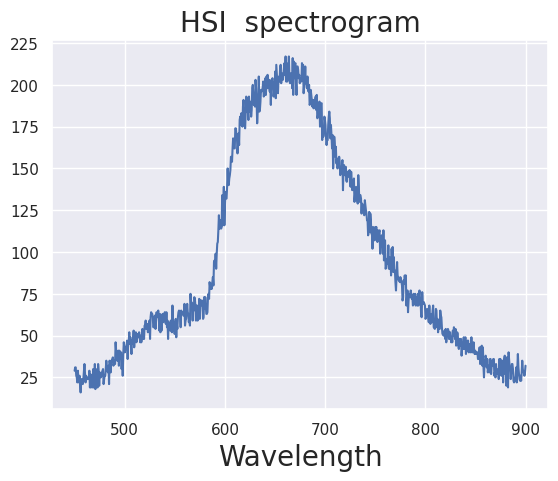

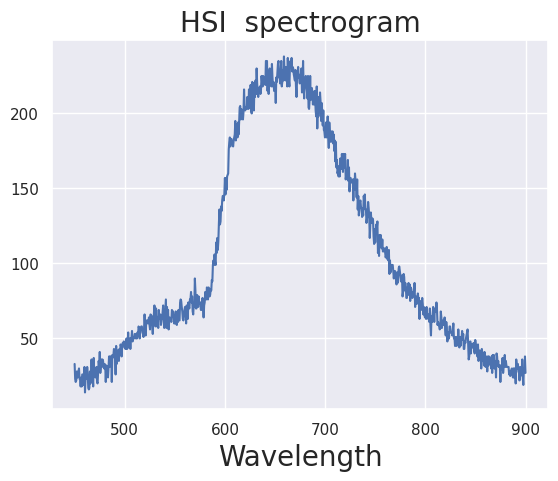

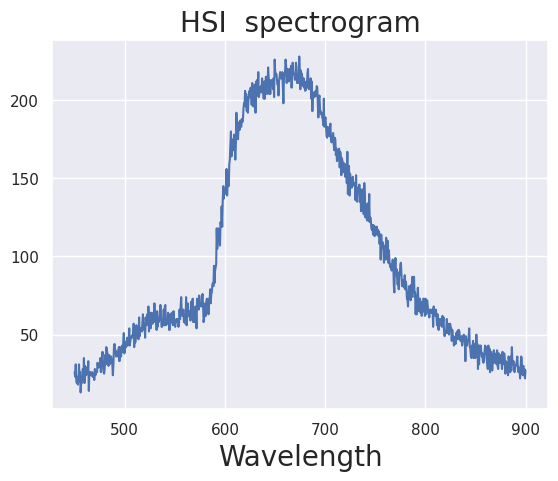

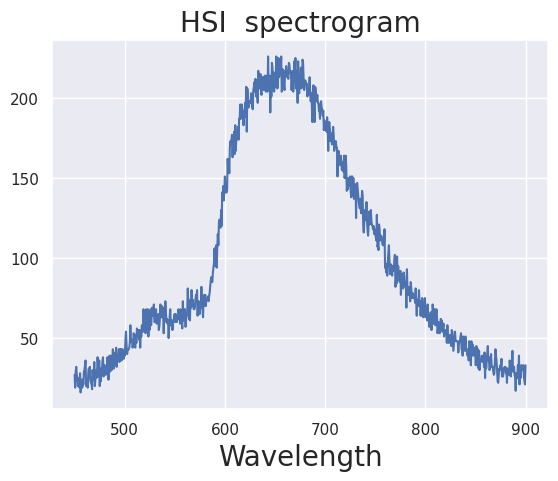

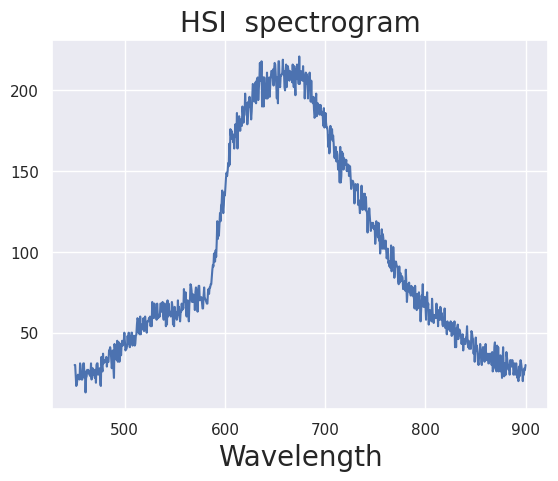

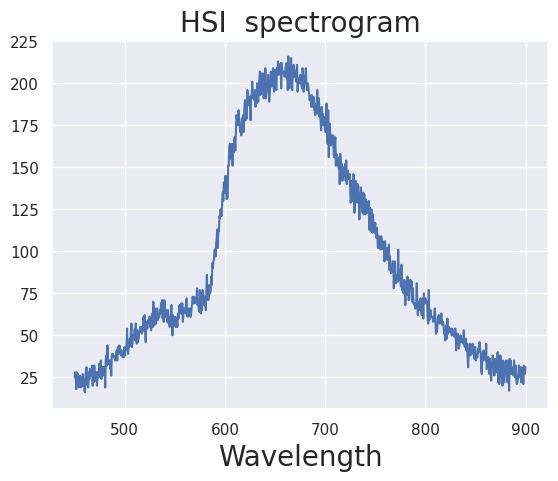

In [125]:
for i in range(len(normal)):
    
    plt.plot(wavelength, normal[i])
    plt.xlabel("Wavelength", fontsize=20)
    plt.title("HSI  spectrogram", fontsize=20)
    plt.show()
    
    if i==20:
        break

In [ ]:
normal = np.asarray(normal)
N = normal[:10000,:]

pca_n = PCA(n_components=10)
pca_n.fit(N)

plt.plot(np.cumsum(pca_n.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('normal')

Text(0.5, 1.0, 'normal')

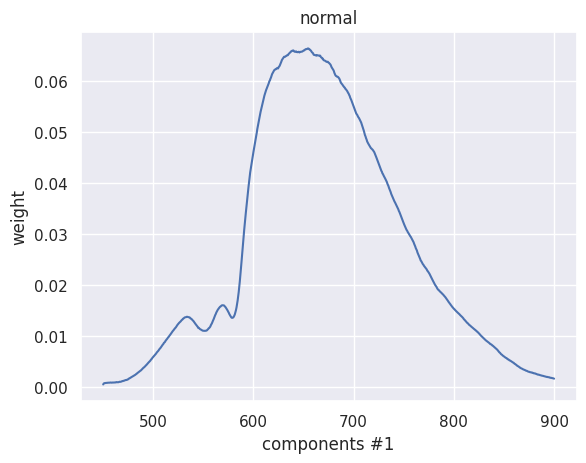

In [136]:
ix = 0

wavelength = np.linspace(450, 900, 826)
plt.plot(wavelength, -pca_n.components_[ix])
plt.xlabel('components #{}'.format(ix+1))
plt.ylabel('weight');
plt.title('normal')

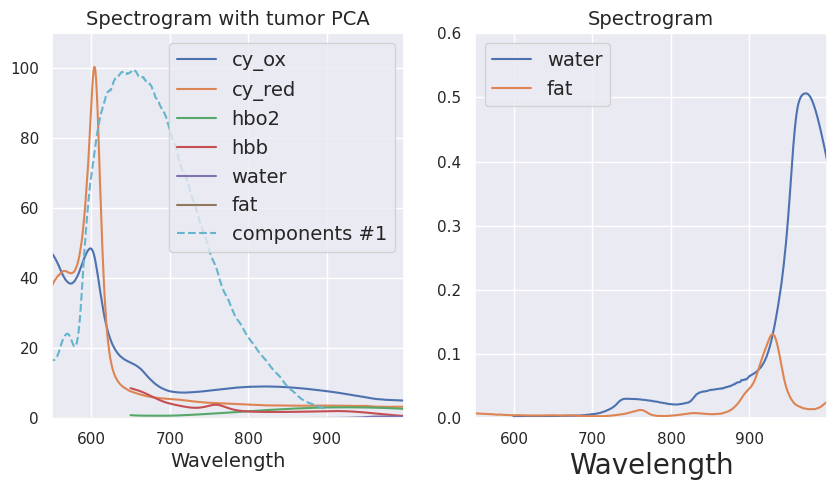

In [137]:
### Visualising spectrograms of chromophores
fig, (ax, ax1) = plt.subplots(ncols=2,figsize=(10,5))

ax.plot(x_cox, y_cox, label='cy_ox')
ax.set_xlabel("Wavelength", fontsize=14)
ax.plot(x_cred, y_cred, label='cy_red')
ax.plot(x_hbo2, y_hbo2, label='hbo2')
ax.plot(x_hbb, y_hbb, label='hbb')
ax.plot(x_water, y_water, label='water')
ax.plot(x_fat, y_fat, label='fat')
ax.plot(wavelength, -pca_n.components_[ix]*1500, 'c--', label='components #{}'.format(ix+1))
ax.set_title("Spectrogram with tumor PCA", fontsize=14)
ax.set_xlim(left_cut, right_cut)
ax.set_ylim(0, 110)
ax.legend(fontsize=14)


ax1.plot(x_water, y_water, label='water')
ax1.set_xlabel("Wavelength", fontsize=20)
ax1.plot(x_fat, y_fat, label='fat')
#ax.set_xlabel("Wavelength", fontsize=20)
ax1.set_title("Spectrogram", fontsize=14)
ax1.set_xlim(left_cut, right_cut)
ax1.set_ylim(0, 0.6)
ax1.legend(fontsize=14)

# All 3: tumor, normal, blood

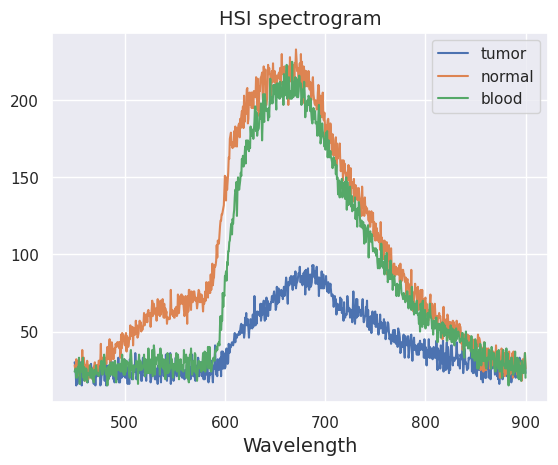

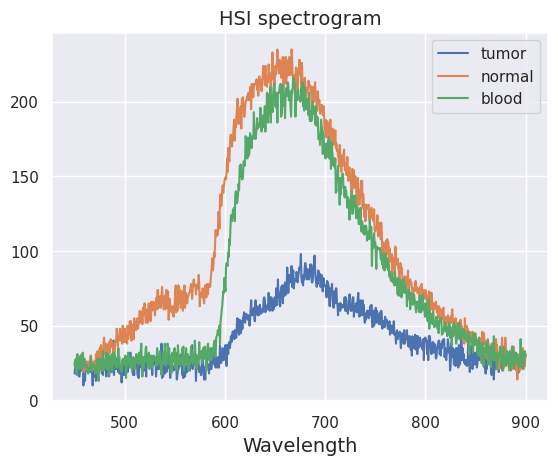

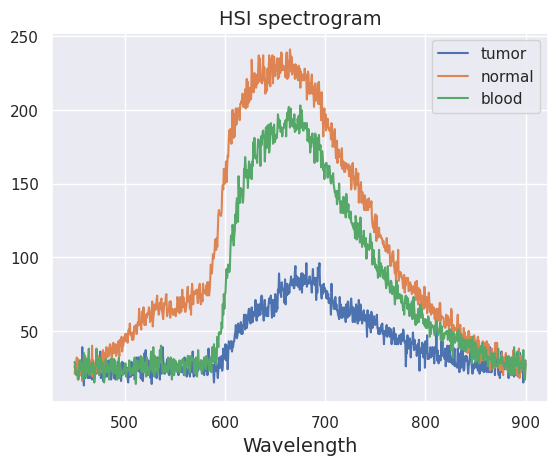

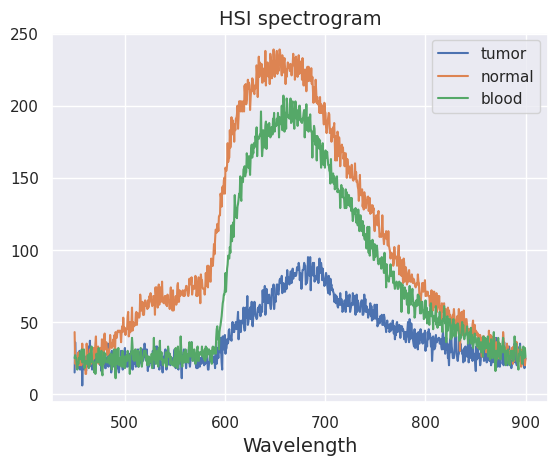

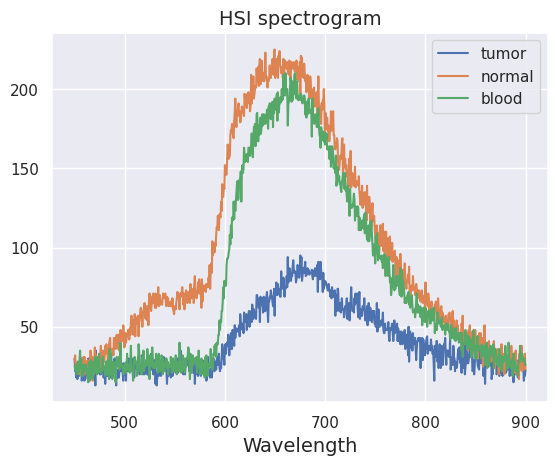

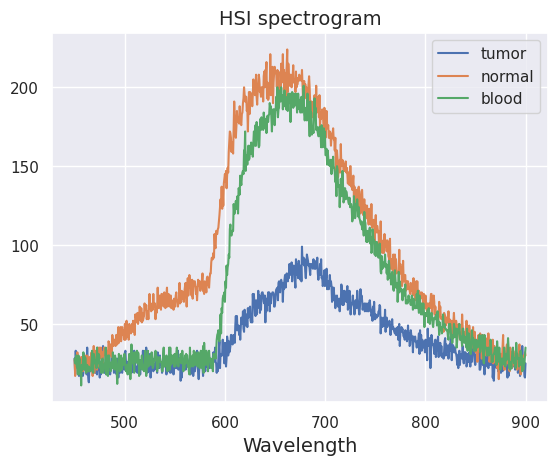

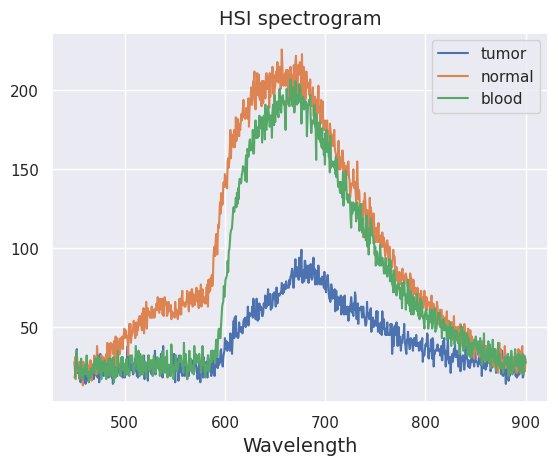

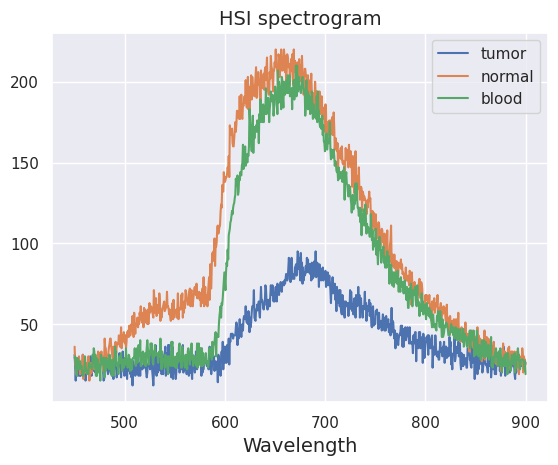

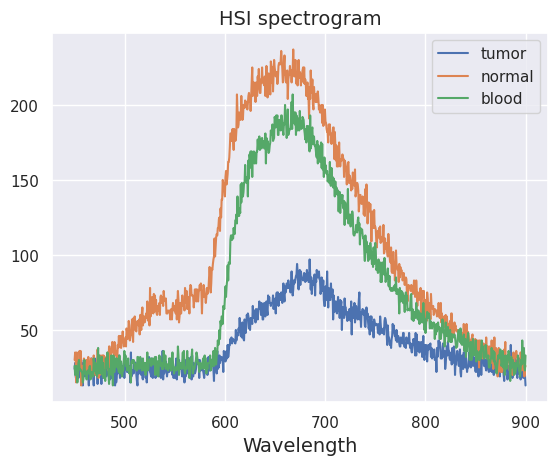

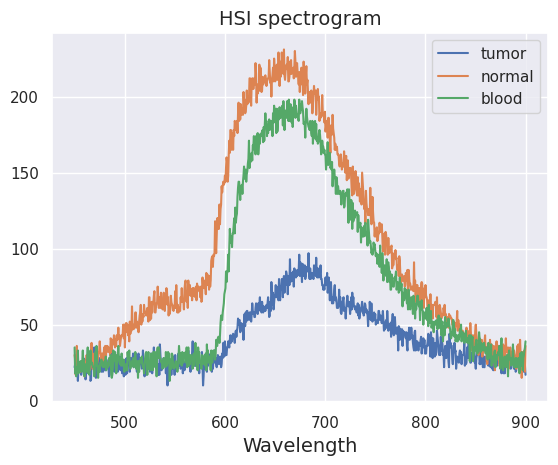

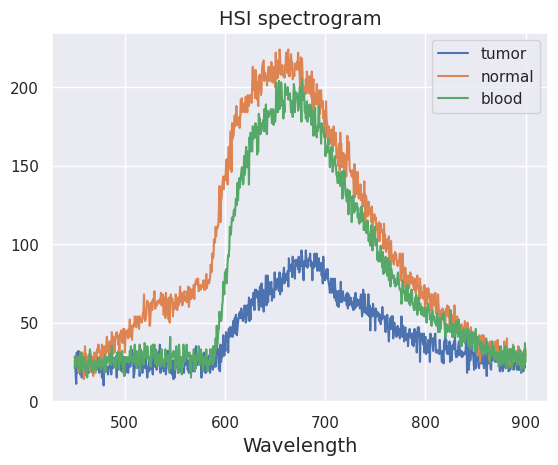

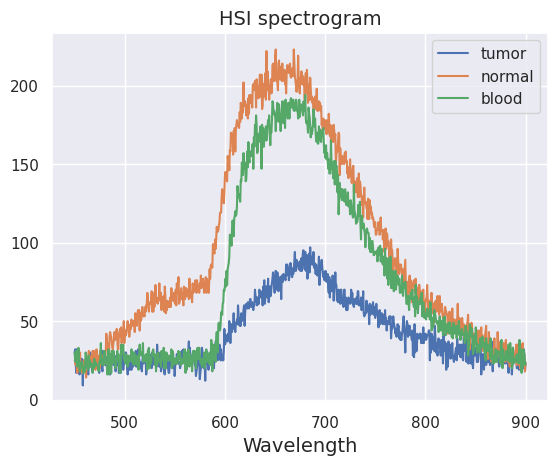

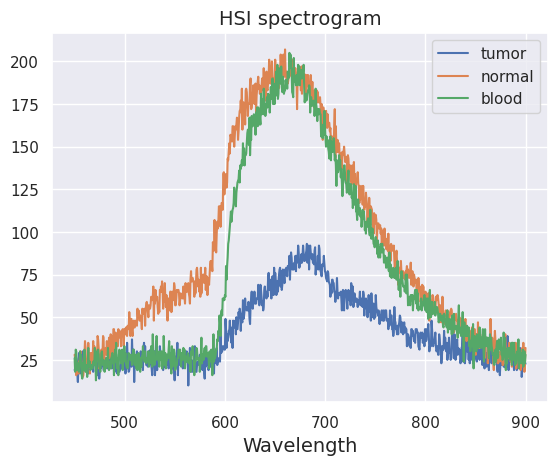

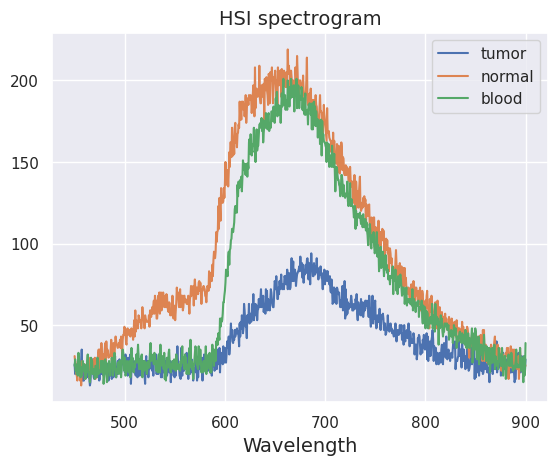

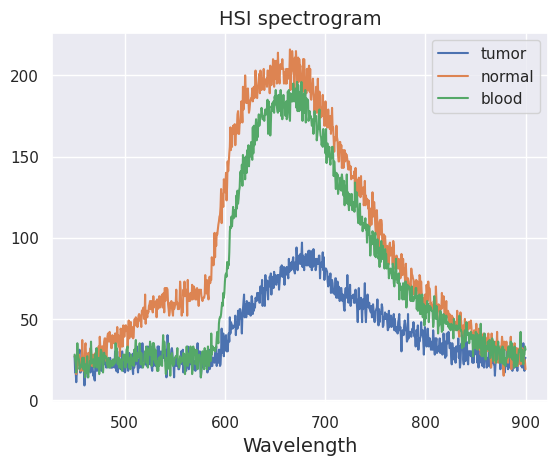

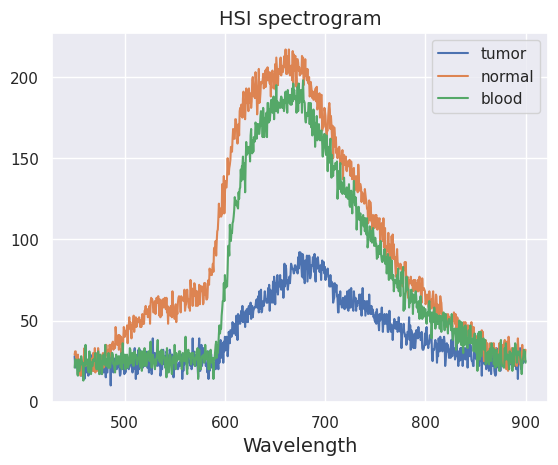

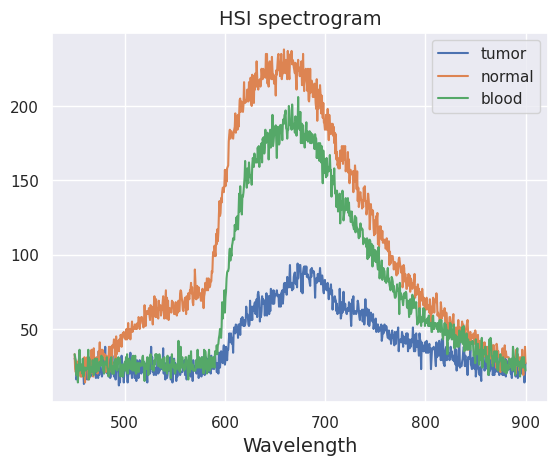

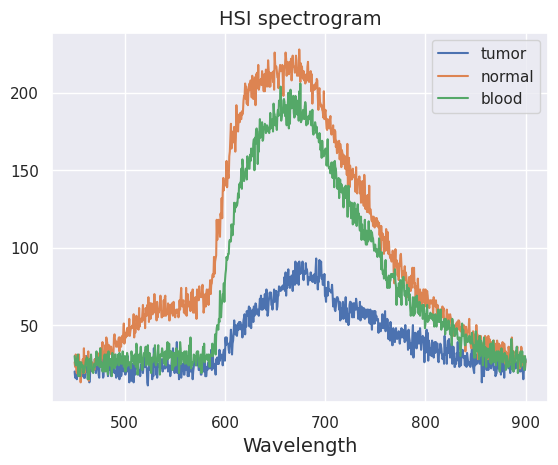

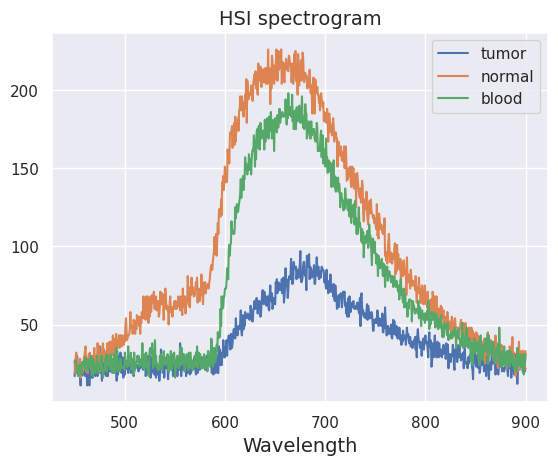

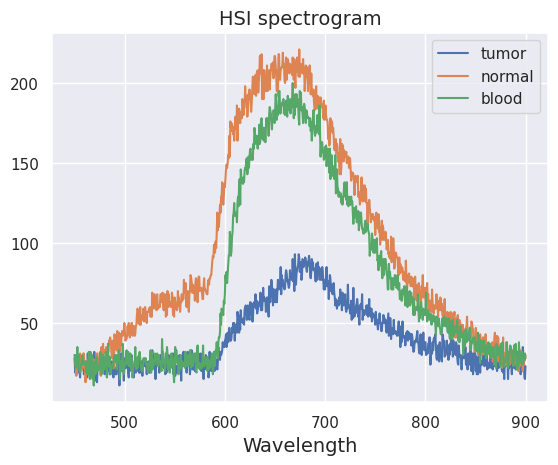

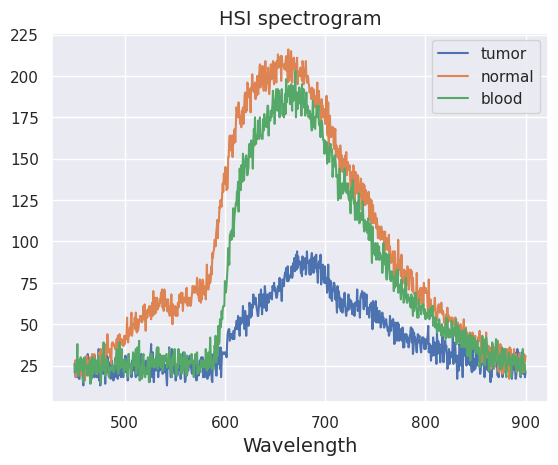

In [174]:
for i in range(len(blood)):
    
    plt.plot(wavelength, tumor[i], label="tumor")
    plt.plot(wavelength, normal[i], label="normal")
    plt.plot(wavelength, blood[i], label="blood")

    plt.xlabel("Wavelength", fontsize=14)
    plt.title("HSI spectrogram", fontsize=14)
    plt.legend()
    plt.show()
    
    if i==20:
        break

# PCA: Normal vs Tumor vs Blood

Text(0.5, 1.0, 'normal vs tumor')

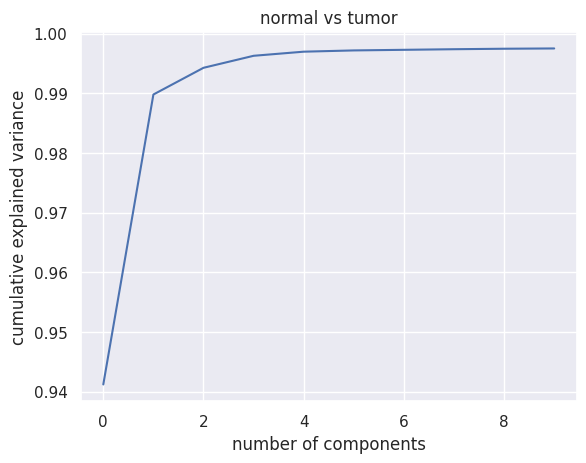

In [261]:
N_and_T_and_B = np.concatenate((normal[:10000,:], tumor[:10000,:], blood[:10000,:]), axis=0)

pca_ntb = PCA(n_components=10)
pca_ntb.fit(N_and_T_and_B)

plt.plot(np.cumsum(pca_nt.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('normal vs tumor')

Text(0.5, 1.0, 'normal vs tumor vs blood')

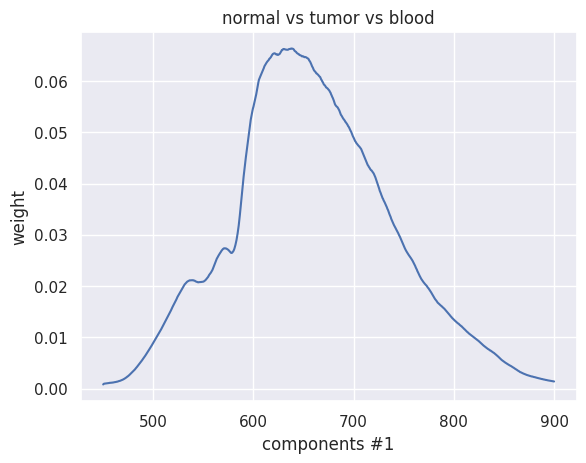

In [263]:
ix = 0

wavelength = np.linspace(450, 900, 826)
plt.plot(wavelength, pca_ntb.components_[ix])
plt.xlabel('components #{}'.format(ix+1))

plt.ylabel('weight');
plt.title('normal vs tumor vs blood')

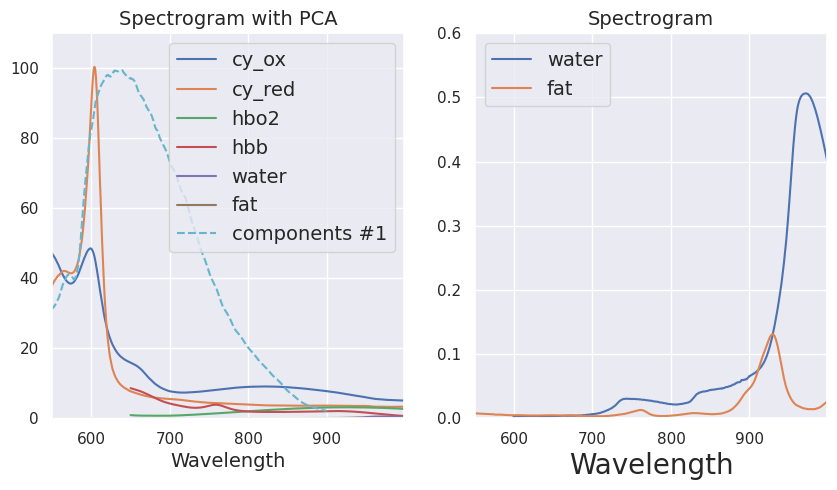

In [264]:
### Visualising spectrograms of chromophores
fig, (ax, ax1) = plt.subplots(ncols=2,figsize=(10,5))

ax.plot(x_cox, y_cox, label='cy_ox')
ax.set_xlabel("Wavelength", fontsize=14)
ax.plot(x_cred, y_cred, label='cy_red')
ax.plot(x_hbo2, y_hbo2, label='hbo2')
ax.plot(x_hbb, y_hbb, label='hbb')
ax.plot(x_water, y_water, label='water')
ax.plot(x_fat, y_fat, label='fat')
ax.plot(wavelength, pca_ntb.components_[ix]*1500, 'c--', label='components #{}'.format(ix+1))
ax.set_title("Spectrogram with PCA", fontsize=14)
ax.set_xlim(left_cut, right_cut)
ax.set_ylim(0, 110)
ax.legend(fontsize=14)


ax1.plot(x_water, y_water, label='water')
ax1.set_xlabel("Wavelength", fontsize=20)
ax1.plot(x_fat, y_fat, label='fat')
#ax.set_xlabel("Wavelength", fontsize=20)
ax1.set_title("Spectrogram", fontsize=14)
ax1.set_xlim(left_cut, right_cut)
ax1.set_ylim(0, 0.6)
ax1.legend(fontsize=14)

(30000, 826)
(30000, 2)


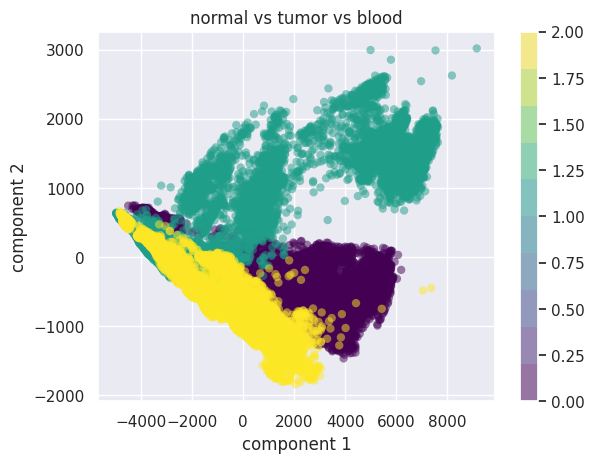

In [268]:
Y = [0 for x in range(10000)] + [1 for x in range(10000)] + [2 for x in range(10000)]
pca2 = PCA(2)  # project from 64 to 2 dimensions
projected = pca2.fit_transform(N_and_T_and_B)
print(N_and_T_and_B.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('normal vs tumor vs blood')
plt.colorbar();

# PCA: Normal vs Blood

Text(0.5, 1.0, 'normal vs blood')

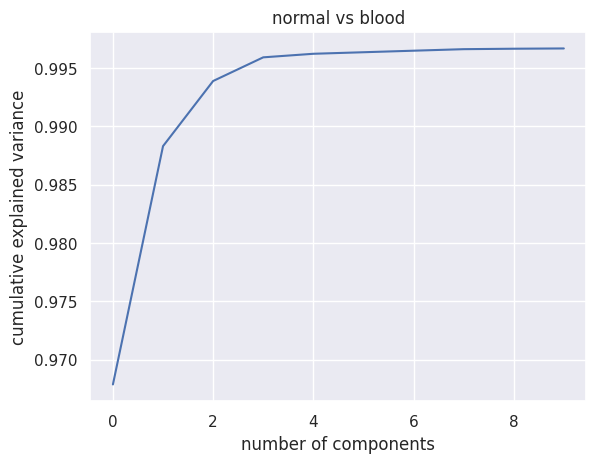

In [155]:
N_and_B = np.concatenate((normal[:10000,:], blood[:10000,:]), axis=0)

pca_nb = PCA(n_components=10)
pca_nb.fit(N_and_B)

plt.plot(np.cumsum(pca_nb.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('normal vs blood')

Text(0.5, 1.0, 'normal vs blood')

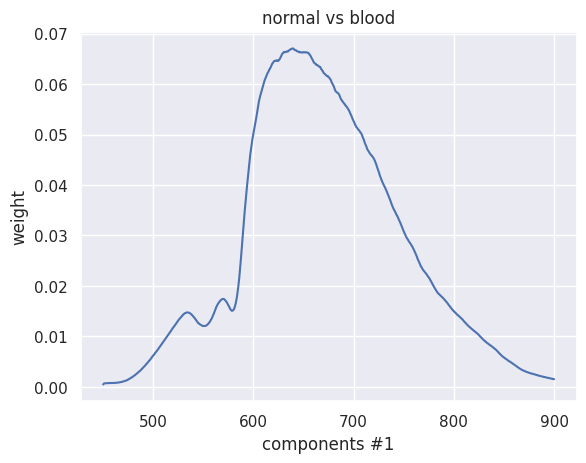

In [154]:
ix = 0

wavelength = np.linspace(450, 900, 826)
plt.plot(wavelength, pca_nb.components_[ix])
plt.xlabel('components #{}'.format(ix+1))

plt.ylabel('weight');
plt.title('normal vs blood')

In [173]:
Y = [0 for x in range(10000)] + [1 for x in range(10000)]

In [171]:
pca2 = PCA(2)  # project from 64 to 2 dimensions
projected = pca2.fit_transform(N_and_B)
print(N_and_B.shape)
print(projected.shape)

(20000, 826)
(20000, 2)


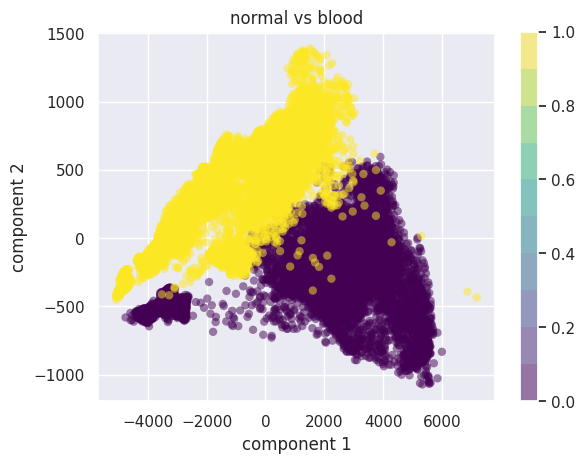

In [175]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('normal vs blood')
plt.colorbar();

# PCA Normal vs Tumor

Text(0.5, 1.0, 'normal vs tumor')

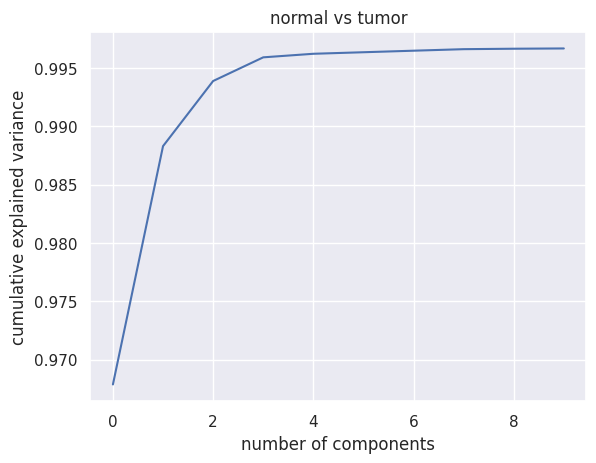

In [177]:
N_and_T = np.concatenate((normal[:10000,:], tumor[:10000,:]), axis=0)

pca_nt = PCA(n_components=10)
pca_nt.fit(N_and_T)

plt.plot(np.cumsum(pca_nb.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('normal vs tumor')

Text(0.5, 1.0, 'normal vs tumor')

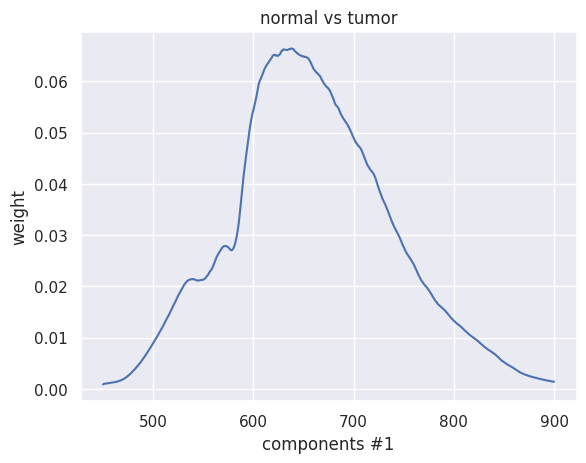

In [178]:
ix = 0

wavelength = np.linspace(450, 900, 826)
plt.plot(wavelength, pca_nt.components_[ix])
plt.xlabel('components #{}'.format(ix+1))

plt.ylabel('weight');
plt.title('normal vs tumor')

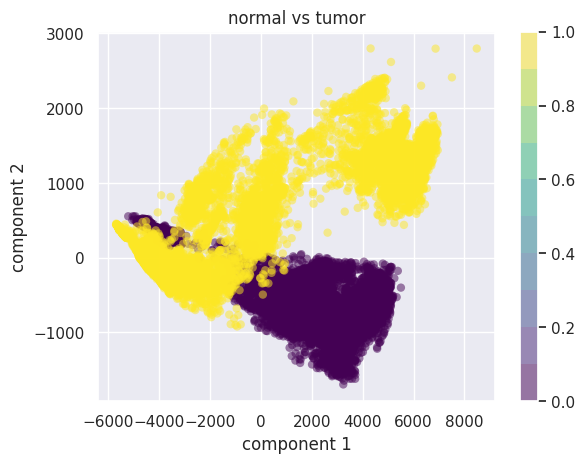

In [179]:
pca2 = PCA(2)  # project from 64 to 2 dimensions
projected = pca2.fit_transform(N_and_T)

plt.scatter(projected[:, 0], projected[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('normal vs tumor')
plt.colorbar();

Text(0.5, 1.0, 'normal vs tumor')

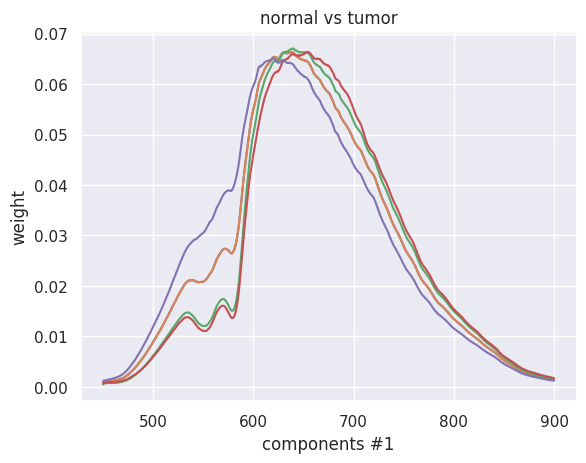

In [271]:
ix = 0

wavelength = np.linspace(450, 900, 826)
plt.plot(wavelength, pca_ntb.components_[ix])
plt.plot(wavelength, pca_nt.components_[ix])
plt.plot(wavelength, pca_nb.components_[ix])
plt.plot(wavelength, -pca_n.components_[ix])
plt.plot(wavelength, pca_t.components_[ix])
#plt.plot(wavelength, pca_b.components_[ix])


plt.xlabel('components #{}'.format(ix+1))

plt.ylabel('weight');
plt.title('normal vs tumor')